In [1]:
import pandas as pd
df = pd.read_csv("cpu.csv")
df[:5]

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [2]:
df.values

array([[  125,   256,  6000, ...,    16,   128,   198],
       [   29,  8000, 32000, ...,     8,    32,   269],
       [   29,  8000, 32000, ...,     8,    32,   220],
       ...,
       [  125,  2000,  8000, ...,     2,    14,    52],
       [  480,   512,  8000, ...,     0,     0,    67],
       [  480,  1000,  4000, ...,     0,     0,    45]], dtype=int64)

In [8]:
X = df.values[:, :-1]
Y = df.values[:, -1]
print(X)
print(Y)
print(X[:3])
print(Y[:3])

[[  125   256  6000   256    16   128]
 [   29  8000 32000    32     8    32]
 [   29  8000 32000    32     8    32]
 ...
 [  125  2000  8000     0     2    14]
 [  480   512  8000    32     0     0]
 [  480  1000  4000     0     0     0]]
[ 198  269  220  172  132  318  367  489  636 1144   38   40   92  138
   10   35   19   28   31  120   30   33   61   76   23   69   33   27
   77   27  274  368   32   63  106  208   20   29   71   26   36   40
   52   60   72   72   18   20   40   62   24   24  138   36   26   60
   71   12   14   20   16   22   36  144  144  259   17   26   32   32
   62   64   22   36   44   50   45   53   36   84   16   38   38   16
   22   29   40   35  134   66  141  189   22  132  237  465  465  277
  185    6   24   45    7   13   16   32   32   11   11   18   22   37
   40   34   50   76   66   24   49   66  100  133   12   18   20   27
   45   56   70   80  136   16   26   32   45   54   65   30   50   40
   62   60   50   66   86   74   93  111  143  105

In [9]:
a = 1
b = 2
print("a: {}, b: {}".format(a,b))

a: 1, b: 2


In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cluster2.csv")
print("Dimensions of the data = {}".format(df.shape))


Dimensions of the data = (1300, 2)


In [12]:
X = df.values
X[:5]

array([[1.07048688, 1.3281469 ],
       [1.07277723, 1.19124898],
       [0.3280287 , 1.26171275],
       [0.60092578, 1.2544653 ],
       [0.75928098, 1.28454059]])

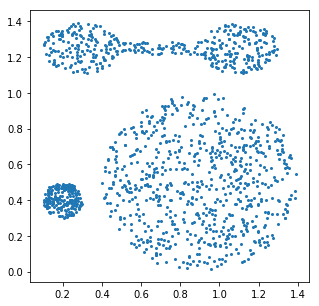

In [13]:
# Set the size of the figure
plt.figure(figsize=(5,5))

# Plot the data points
plt.scatter(X[:,0], X[:,1], s=4)

# Print the figure
plt.show()


In [15]:
cmap = 'tab10'

[0 0 3 3 0 3 3]
[[1.01379946 1.15444051]
 [1.03377029 0.43895496]
 [0.37933677 0.43852558]
 [0.34274065 1.2515179 ]]


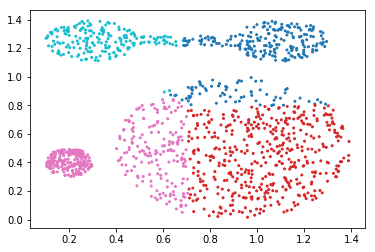

In [18]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 4, random_state = 0)
y_pred = k_means.fit_predict(X)
print(y_pred[:7])
print(k_means.cluster_centers_)
plt.scatter(X[:,0], X[:,1], s=4, c=y_pred, cmap=cmap)
plt.show()

In [21]:
for i,x in enumerate(('a', 'b', 'c')):
    print(i,x)

0 a
1 b
2 c


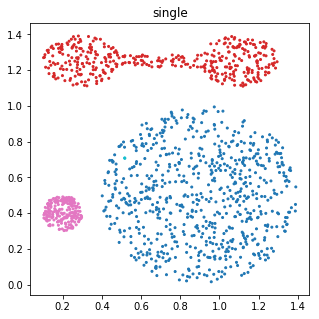

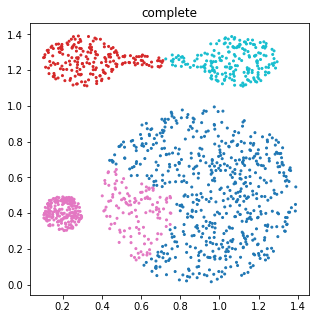

In [22]:
from sklearn.cluster import AgglomerativeClustering
for i, linkage in enumerate(('single', 'complete')):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(i +1, figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=y_pred, s=4, cmap=cmap)
    plt.title(linkage)
plt.show()


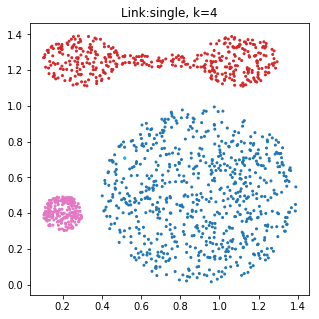

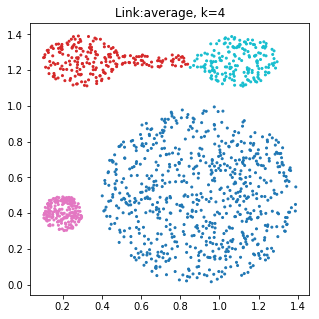

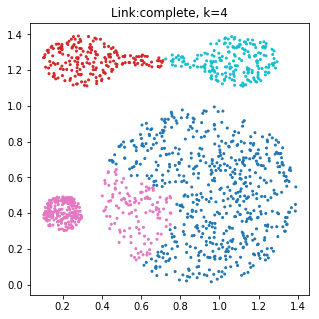

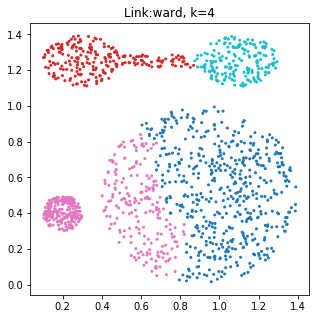

In [25]:
for i, link in enumerate(('single', 'average', 'complete', 'ward')):
    for j,k in enumerate((2,3,4)):
        clustering = AgglomerativeClustering(linkage =link, n_clusters=k, affinity = 'euclidean')
    y_pred = clustering.fit_predict(X)
    plt.figure(i*3+j, figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=y_pred, s=4, cmap='tab10')
    plt.title('Link:{}, k={}'.format(link,k))
plt.show()

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=20)
y_pred = dbscan.fit_predict(X)
print(y_pred[:10])

[ 0  4 -1 -1 -1 -1 -1 -1 -1 -1]


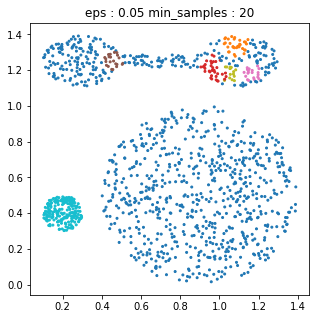

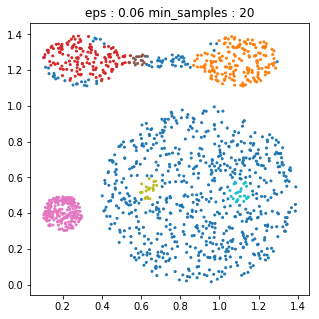

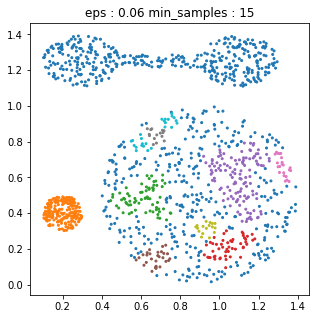

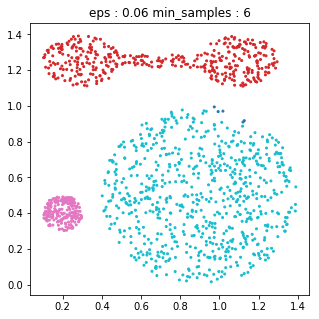

In [29]:
for i, (eps,min_samples) in enumerate(((0.05,20),(0.06,20),(0.06,15),(0.06,6))) :
    clust = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = clust.fit_predict(X)
    plt.figure(i+1,figsize=(5,5))
    plt.scatter(X[:,0] ,X[:, 1],s = 4, c= y_pred, cmap=cmap)
    plt.title(f'eps : {eps} min_samples : {min_samples}')
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
